In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **A Gentle Introduction to White Noise**

White noise is an important concept in time series forecasting. If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

**What is White Noise**

A time series is white noise if the variables are independent and identically distributed with a mean of zero. This means that all variables have the same variance ($\ sigma^2 $)and each value has a zero correlation with all other values in the series. If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

**Why Does it Matter?**

Two reasons:
- **Predictability:** If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
- **Model Diagnostics:** The series of errors from a time series forecast model should ideally be white noise.

Model Diagnostics is an important area of time series forecasting. Time series data are
expected to contain some white noise component on top of the signal generated by the underlying
process. For example:

$\ y(t) = signal(t) + noise(t)$


Once predictions have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise. **When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predictions.** All that is left is the random fluctuations that cannot be modeled. A sign that model predictions are not white noise is an indication that further improvements to the forecast model may be possible.

**Is your Time Series White Noise?**

Your time series is not white noise if any of the following conditions are true:
- Does your series have a non-zero mean?
- Does the variance change over time?
- Do values correlate with lag values?

Some tools that you can use to check if your time series is white noise are:
- *Create a line plot.* Check for gross features like a changing mean, variance, or obvious relationship between lagged variables.
- *Calculate summary statistics.* Check the mean and variance of the whole series against the mean and variance of meaningful contiguous blocks of values in the series (e.g. days, months, or years).
- *Create an autocorrelation plot.* Check for gross correlation between lagged variables.


**Example of White Noise Time Series**

In this section, we will create a Gaussian white noise series in Python and perform some checks. It is helpful to create and review a white noise time series in practice. It will provide the frame of reference and example plots and statistical tests to use and compare on your own time series projects to check if they are white noise. Firstly, we can create a list of 1,000 random Gaussian variables using the gauss() function from the random module. We will draw variables from a Gaussian distribution with a mean (mu) of 0.0 and a standard deviation (sigma) of 1.0. Once created, we can wrap the list in a Pandas Series for convenience.


In [11]:
# Example of White Noise Time Series 

from random import gauss,seed

# seed random number generator
seed(1)

series = [gauss(0.0,1.0) for i in range(1000)]

series = pd.Series(series) # converting the list into a series
series.head(10)

0    1.288185
1    1.449446
2    0.066336
3   -0.764544
4   -1.092173
5    0.031335
6   -1.022103
7   -1.436829
8    0.199312
9    0.133375
dtype: float64

In [15]:
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

Text(0.5, 0.98, 'Line plot of white noise series.')

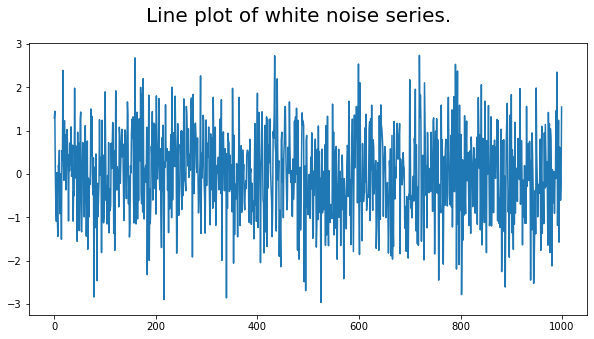

In [23]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=series,x=series.index,y=series.values)
fig.suptitle('Line plot of white noise series.',fontsize=20)

Text(0.5, 0.98, 'Histogram of white noise series.')

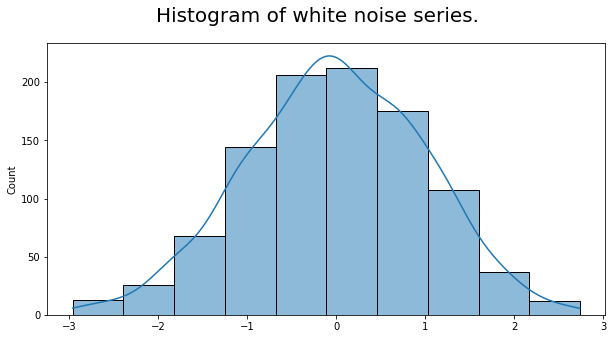

In [28]:
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=series,bins=10,kde=True)
fig.suptitle('Histogram of white noise series.',fontsize=20)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

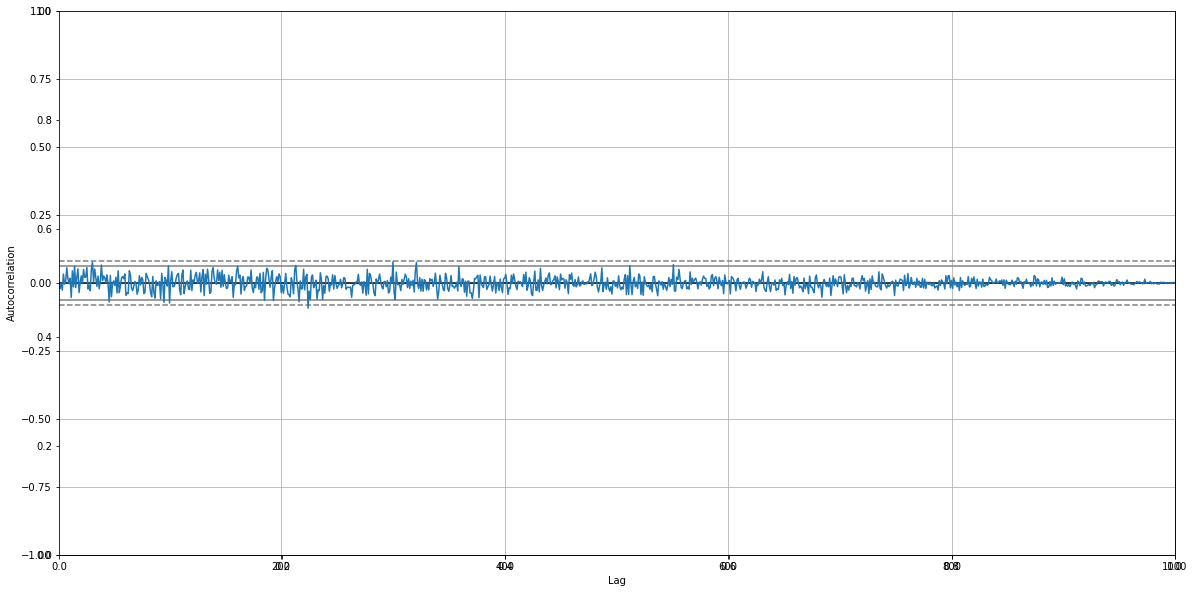

In [35]:
# Autocorrelation
fig = plt.subplots(figsize=(20,10))
pd.plotting.autocorrelation_plot(series)

**Summary**

- White noise time series is defined by a zero mean, constant variance, and zero correlation.
- If your time series is white noise, it cannot be predicted, and if your forecast residuals are not white noise, you may be able to improve your model.
- The statistics and diagnostic plots you can use on your time series to check if it is white noise.